# Multiagent Pattern - Multiagent Collaboration

<img src="../img/multiagent_pattern.png" alt="Alt text" width="500"/>

---

In [ ]:
from agentic_patterns.multiagent_pattern.agent import Agent
from agentic_patterns.multiagent_pattern.crew import Crew

In [ ]:
agent_1 = Agent(
    name="Poem Writer Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
)

In [ ]:
agent_2 = Agent(
    name="Poem Translator Agent",
    backstory="You are an expert translator especially skilled in Ancient Greek",
    task_description="Translate a poem into Ancient Greek", 
    task_expected_output="Just output the translated poem and nothing else"
)

In [ ]:
agent_1 >> agent_2

In [ ]:
print(agent_1.run())

In [ ]:
print(agent_2.context)

In [ ]:
print(agent_2.run())

### Minimalistic CrewAI

In [1]:
from agentic_patterns.multiagent_pattern.agent import Agent
from agentic_patterns.multiagent_pattern.crew import Crew

In [2]:
with Crew() as crew:
    agent_1 = Agent(
        name="Poem Writer Agent",
        backstory="You are a well-known poet, who enjoys creating high quality poetry.",
        task_description="Write a poem about the meaning of life",
        task_expected_output="Just output the poem, without any title or introductory sentences",
    )

    agent_2 = Agent(
        name="Poem Translator Agent",
        backstory="You are an expert translator especially skilled in Ancient Greek",
        task_description="Translate a poem into Ancient Greek", 
        task_expected_output="Just output the translated poem and nothing else"
    )

    agent_1 >> agent_2 

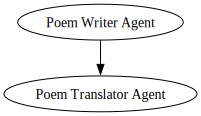

In [3]:
crew.plot()

In [4]:
crew.run()


RUNNING AGENT: Poem Writer Agent

In the grand tapestry of time and space,
A fleeting moment, a wondrous face,
We search for answers, night and day,
To the eternal question, "What's the way?"

Is it in love, in laughter, in tears,
In joy, in sorrow, through all our years?
Is it a journey, or a destination too,
A choice we make, or a path we pursue?

Perhaps it's in the beauty we behold,
In sunsets painted, in stories told,
In the kindness of strangers, in the love we share,
In the memories we cherish, and the moments we spare.

Or maybe it's in the whispers of our heart,
A gentle voice that sets us apart,
A calling that guides us through life's test,
A beacon that shines, and forever finds its best.

Whatever the answer, whatever the key,
It's in embracing each moment, wild and free,
For in the end, it's not the years we live,
But the life we pour into each moment we give.

RUNNING AGENT: Poem Translator Agent

Ἐν τῇ μεγάλῃ τῆς ἀιωνίως διαστήματι τῆς χρονοῦ καὶ τοῦ χώρου,
Μία φεύγουσα